<a href="https://colab.research.google.com/github/abhaykh19/abhaykh19/blob/dev/Flat_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Real Estate Price Predictor

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('./Boston_data.csv')

In [ ]:
df=df.drop(['Unnamed: 14', 'Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],axis=1)

In [ ]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [ ]:
#getting the distinct values
for i in df.columns:
  print("distinct values for columns {0} is {1} ".format(i,len(df[i].unique())))

distinct values for columns CRIM is 504 
distinct values for columns ZN is 26 
distinct values for columns INDUS is 76 
distinct values for columns CHAS is 2 
distinct values for columns NOX is 81 
distinct values for columns RM is 446 
distinct values for columns AGE is 356 
distinct values for columns DIS is 412 
distinct values for columns RAD is 9 
distinct values for columns TAX is 66 
distinct values for columns PTRATIO is 46 
distinct values for columns B is 357 
distinct values for columns LSTAT is 455 
distinct values for columns MEDV is 229 


In [ ]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
% matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c7ec46cd0>,
      dtype=object)

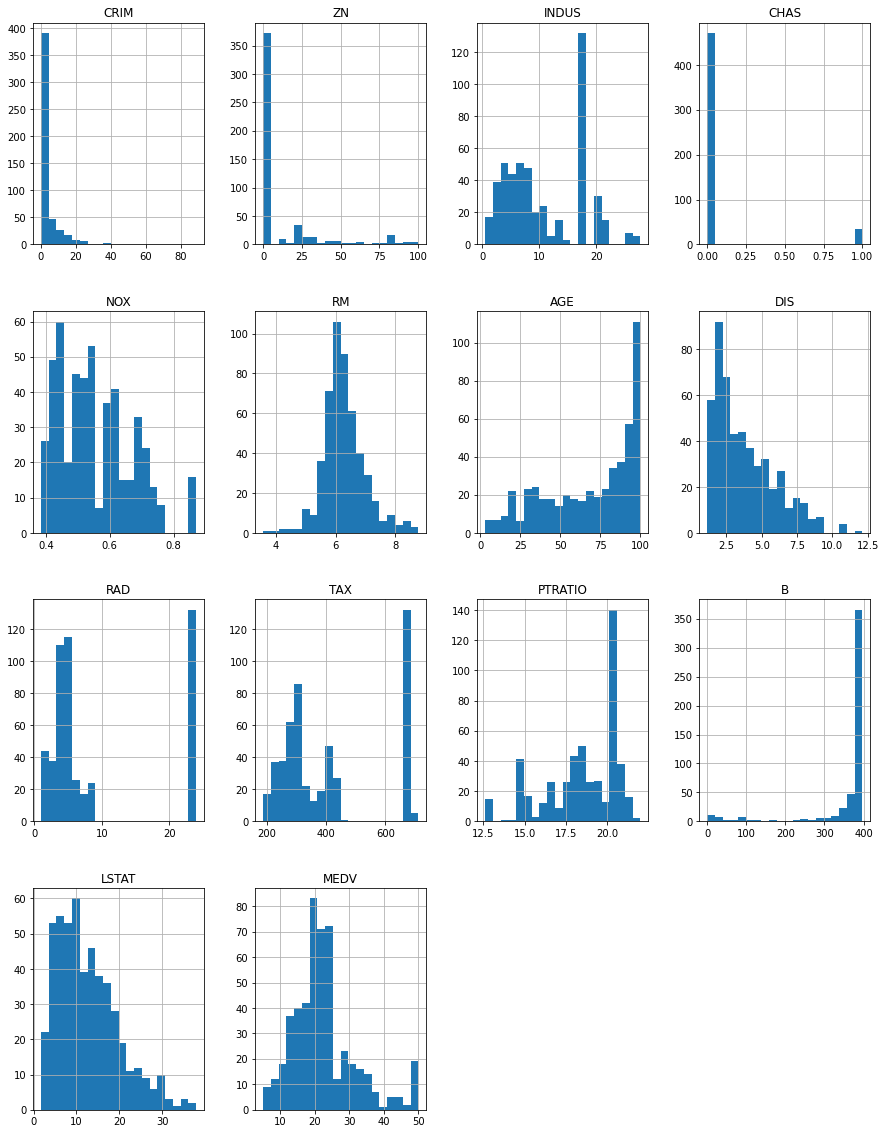

In [ ]:
#plotting histogram

df.hist(bins=20,figsize=[15,20])

In [ ]:
# train test split
import numpy as np

def train_test_split(data,test_ratio):
  np.random.seed(42)
  shuffled=np.random.permutation(len(data))
  test_set_data=int(len(data)*test_ratio)
  test_indices= shuffled[:test_set_data]
  train_indices=shuffled[test_set_data:]
  return data.iloc[train_indices],data.iloc[test_indices]


In [ ]:
train_set,test_set= train_test_split(df,0.2)

In [ ]:
print(len(train_set),len(test_set))

405 101


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
# split(df,df['CHAS'])
for train_index,test_index in split.split(df,df['CHAS']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]

In [ ]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
# GET CORRELATIONS
corr_matrix=df.corr()

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [ ]:
df=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c7e3e2850>,
      dtype=object)

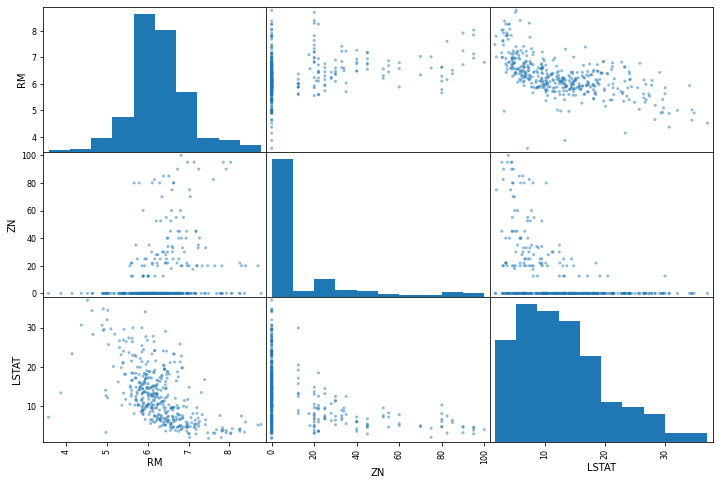

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["RM","ZN","LSTAT"]
scatter_matrix(df[attributes],figsize=[12,8])

In [ ]:
# Getting Attributes
df['TAXRM']=df['TAX']/df['RM']

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c7dfaf510>,
      dtype=object)

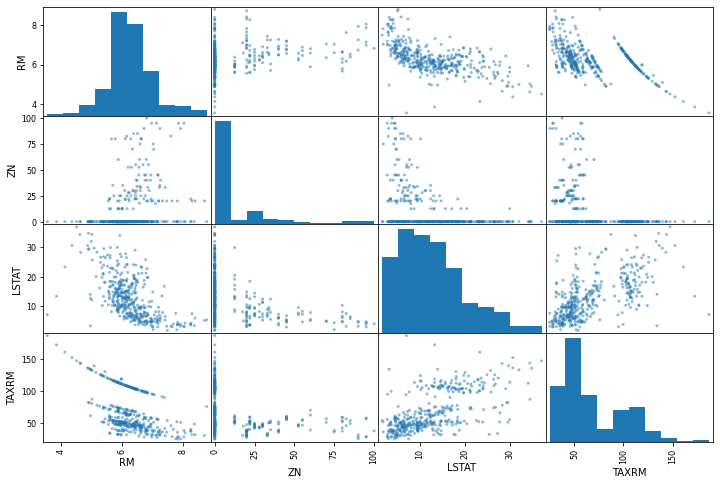

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["RM","ZN","LSTAT","TAXRM"]
scatter_matrix(df[attributes],figsize=[12,8])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df1=df.copy()
imputer=SimpleImputer(strategy='median')
imputer.fit(df1)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21000000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 5.39474541e+01])

In [ ]:
X=imputer.transform(df1)

In [ ]:
print(X)

[[4.81900000e-02 8.00000000e+01 3.64000000e+00 ... 3.92890000e+02
  6.57000000e+00 5.15717092e+01]
 [1.50100000e-02 8.00000000e+01 2.01000000e+00 ... 3.90940000e+02
  5.99000000e+00 4.22004521e+01]
 [4.87141000e+00 0.00000000e+00 1.81000000e+01 ... 3.96210000e+02
  1.86800000e+01 1.02714374e+02]
 ...
 [8.18700000e-02 0.00000000e+00 2.89000000e+00 ... 3.93530000e+02
  3.57000000e+00 3.52941176e+01]
 [4.75237000e+00 0.00000000e+00 1.81000000e+01 ... 5.09200000e+01
  1.81300000e+01 1.02068966e+02]
 [4.56000000e-02 0.00000000e+00 1.38900000e+01 ... 3.92800000e+02
  1.35100000e+01 4.68750000e+01]]


In [ ]:
housing_tr=pd.DataFrame(X,columns=df1.columns)

In [ ]:
print(housing_tr)

        CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT       TAXRM
0    0.04819  80.0   3.64   0.0  ...     16.4  392.89   6.57   51.571709
1    0.01501  80.0   2.01   0.0  ...     17.0  390.94   5.99   42.200452
2    4.87141   0.0  18.10   0.0  ...     20.2  396.21  18.68  102.714374
3    0.18159   0.0   7.38   0.0  ...     19.6  396.90   6.87   45.012547
4    0.30347   0.0   7.38   0.0  ...     19.6  396.90   6.15   45.468948
..       ...   ...    ...   ...  ...      ...     ...    ...         ...
399  3.53501   0.0  19.58   1.0  ...     14.7   88.01  15.02   65.507152
400  7.05042   0.0  18.10   0.0  ...     20.2    2.52  23.29  109.126659
401  0.08187   0.0   2.89   0.0  ...     18.0  393.53   3.57   35.294118
402  4.75237   0.0  18.10   0.0  ...     20.2   50.92  18.13  102.068966
403  0.04560   0.0  13.89   1.0  ...     16.4  392.80  13.51   46.875000

[404 rows x 14 columns]


In [ ]:
#Scikit learn design
# Estimators
# transformers
# predictors

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
                      ('imputer',SimpleImputer(strategy='median')),
                      ('std_scaler',StandardScaler())
])

In [ ]:
print(housing_tr)

        CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT       TAXRM
0    0.04819  80.0   3.64   0.0  ...     16.4  392.89   6.57   51.571709
1    0.01501  80.0   2.01   0.0  ...     17.0  390.94   5.99   42.200452
2    4.87141   0.0  18.10   0.0  ...     20.2  396.21  18.68  102.714374
3    0.18159   0.0   7.38   0.0  ...     19.6  396.90   6.87   45.012547
4    0.30347   0.0   7.38   0.0  ...     19.6  396.90   6.15   45.468948
..       ...   ...    ...   ...  ...      ...     ...    ...         ...
399  3.53501   0.0  19.58   1.0  ...     14.7   88.01  15.02   65.507152
400  7.05042   0.0  18.10   0.0  ...     20.2    2.52  23.29  109.126659
401  0.08187   0.0   2.89   0.0  ...     18.0  393.53   3.57   35.294118
402  4.75237   0.0  18.10   0.0  ...     20.2   50.92  18.13  102.068966
403  0.04560   0.0  13.89   1.0  ...     16.4  392.80  13.51   46.875000

[404 rows x 14 columns]


In [ ]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [ ]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.50635717],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739, -0.80462611],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  1.12141466],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303, -1.02444134],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  1.10087256],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681, -0.65584432]])

In [ ]:
#selecting a desired model for the data

In [ ]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.50635717],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739, -0.80462611],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  1.12141466],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303, -1.02444134],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  1.10087256],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681, -0.65584432]])

In [ ]:
housing_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model_decision_tree=DecisionTreeRegressor()
model_decision_tree.fit(housing_num_tr,housing_labels)
# model=LinearRegression()
# model.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [ ]:
some_labels=housing_labels.iloc[:5]
some_data=df.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.60509741, 26.91434055, 18.85838542, 24.9820058 , 24.13451146])

In [ ]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [ ]:
#finding Root mean squared error
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [ ]:
print(lin_rmse)

4.217481617985453
